Q.1 What is Deep Learning?

Ans.Deep learning is a subset of Machine Learning.Deep learning is a machine learning technique that teaches computers to do what comes naturally to humans.For example if we human see a book on the table we can identify that ok that is a book on the table. even if we have never seen that perticular objects (which is book and table) before.you know why, because our mind has seen many books in past so we know the featutes of book.so our mind have learned all the features and all the weights assosiated with that. for example if we consider the size, width,some text or imageon book,the palce where generally we found book and many more,thus by the past data of book we have seen untill.our mind is trained on that data set.so this is how our mind works,and yes offcourse there will be many feature which our mind consider and that are complex too,but this was just the example to understand.
Thus Deep learning is Neural network that tries to copy the human brain.at each moment our brain meet with the data and it gets trained at every moment that is so complex us to understand.but yes from this we can undersatnd that to train NN we need large dataset.


Q.2 Why Deep Learning is so famous.

Ans.because Deep learning NN can progressively extract High level feature from the raw input data.in simple machine learning moel we tries to built or find the new feature that helps to classification or in regressin while in Deep Learning we dont need to do that.NN automatically construct new feature.

Q.3 Why Can't we stick to the traditional Machine learning models?

Ans. By using Simple machine learning models as we increase the data the accuracy will get increased but after some level,the accuracy become constant it does not get increased  even if we increase data.while in NN more and more the data we provide  we get the higher and higher accuracy.

Q.4 types of NN

Ans.(1)MLP,CNN,RNN, and many more

Lets train very simple churn prediction model for bank data.


In [1]:
from google.colab import drive
import pandas as pd
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull().sum()
#there are no null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)# as they are useless in identifying that custmer will stay or leave

In [4]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense# Dence will create dense layer

In [ ]:
model=Sequential()

In [ ]:
#Sequential.add(layer)
model.add(Dense(11,activation="relu",input_dim=11))#it will add three activation function in hidden layer 1
model.add(Dense(3,activation="relu"))#it will add three activation function in hidden layer 2
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 11)                132       
                                                                 
 dense_41 (Dense)            (None, 3)                 36        
                                                                 
 dense_42 (Dense)            (None, 1)                 4         
                                                                 
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [ ]:
history=model.fit(X_train_trf,y_train,epochs=50,batch_size=50,validation_split=0.2)

Epoch 1/50
128/128 [==============================] - 1s 4ms/step - loss: 0.5707 - accuracy: 0.7958 - val_loss: 0.5010 - val_accuracy: 0.7969
Epoch 2/50
128/128 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.7958 - val_loss: 0.4611 - val_accuracy: 0.7969
Epoch 3/50
128/128 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.7958 - val_loss: 0.4472 - val_accuracy: 0.7969
Epoch 4/50
128/128 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.7958 - val_loss: 0.4405 - val_accuracy: 0.7969
Epoch 5/50
128/128 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.7958 - val_loss: 0.4354 - val_accuracy: 0.7969
Epoch 6/50
128/128 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.7958 - val_loss: 0.4313 - val_accuracy: 0.7969
Epoch 7/50
128/128 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.7958 - val_loss: 0.4268 - val_accuracy: 0.7969
Epoch 

In [ ]:
w_and_b_in_layer_1=model.layers[0].get_weights()
w_in_layer1=w_and_b_in_layer_1[0]
b_in_layer2=w_and_b_in_layer_1[1]
print("weight matrix in layer1 ",w_in_layer1.shape)
print("bias  in layer 1,",b_in_layer2.shape)

weight matrix in layer1  (11, 11)
bias  in layer 1, (11,)


In [ ]:
y_prob_of_class1=model.predict(X_test_trf)# the output is probability as it is derived by sigmoid function

63/63 [==============================] - 0s 1ms/step


In [ ]:
#lets take 0.5 as a threshold
import numpy as np
y_pred=np.where(y_prob_of_class1>0.5,1,0)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

0.8605

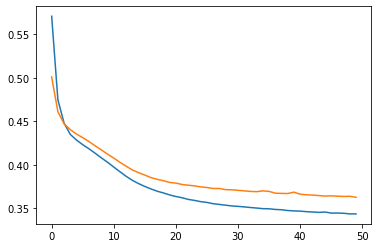

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

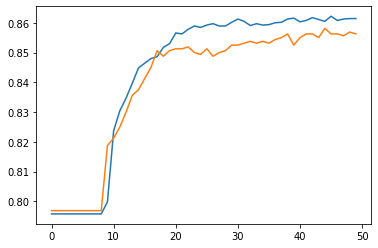

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [ ]:
#Note :here we can try with more layers,different activation functionsand more number of actication functins in each layer etc 